In [1]:
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Portfolio import Portfolio
from Treasury import Treasury
import pandas as pd

Max sharpe ratio: 0.6862228837661504
Max sharpe ratio portfolio annualized log return: 0.09892035082918843
Max sharpe ratio portfolio annualized volatility of log returns: 0.07166513985146157
Max sharpe ratio portfolio weights: [ 0.26869539  0.5         0.05342778  0.13645127 -0.11686584 -0.03039319
 -0.5         0.0104175   0.5         0.5        -0.08480623 -0.23692667]

                                GLD            SPY            XLE  \
                     GLD Log Return SPY Log Return XLE Log Return   
GLD  GLD Log Return        0.032492      -0.000576       0.005398   
SPY  SPY Log Return       -0.000576       0.038181       0.048186   
XLE  XLE Log Return        0.005398       0.048186       0.093650   
XLY  XLY Log Return       -0.003111       0.038696       0.044574   
CL1  CL1 Log Return        0.014750       0.026217       0.062758   
GC1  GC1 Log Return        0.027572      -0.001825       0.002655   
ES1  ES1 Log Return       -0.000516       0.038580       0.048771   
NG1

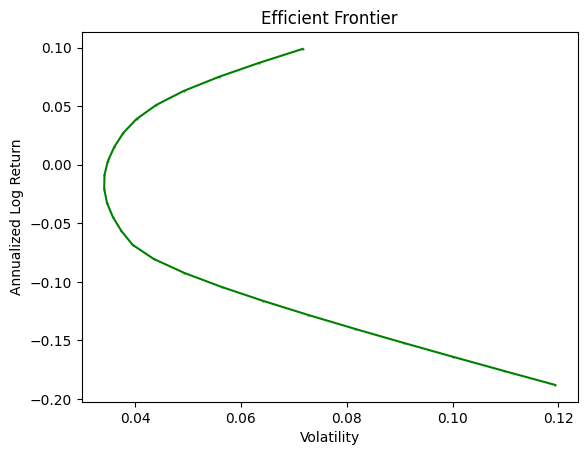

In [3]:
def get_risk_free_rate(dateString):
    df = pd.read_csv("../Data/TreasuryData/Cleaned-Data/cleaned_treasury_data.csv")
    df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    halfYear = df["6 Mo"].to_frame()
    rf = halfYear.loc[dateString, '6 Mo']
    rf = rf / 100
    return rf


etfBND = ETF("BND")
etfDBC = ETF("DBC")
etfGLD = ETF("GLD")
etfQQQ = ETF("QQQ")
etfSPY = ETF("SPY")
etfXLB = ETF("XLB")
etfXLE = ETF("XLE")
etfXLF = ETF("XLF")
etfXLI = ETF("XLI")
etfXLK = ETF("XLK")
etfXLP = ETF("XLP")
etfXLU = ETF("XLU")
etfXLV = ETF("XLV")
etfXLY = ETF("XLY")
futureCL1 = Future("CL1")
futureDX1 = Future("DX1")
futureES1 = Future("ES1")
futureFF1 = Future("FF1")
# Skipped FF4
futureGC1 = Future("GC1")
futureNG1 = Future("NG1")
futureSI1 = Future("SI1")
treasurySixMonth = Treasury("0.5")
treasuryOneYear = Treasury("1.0")
treasuryTwoYear = Treasury("2.0")
treasuryThreeYear = Treasury("3.0")
treasuryFiveYear = Treasury("5.0")
treasurySevenYear = Treasury("7.0")
treasuryTenYear = Treasury("10.0")
treasuryThirtyYear = Treasury("30.0")
all_assets = [
    etfBND, etfDBC, etfGLD, etfQQQ, etfSPY, etfXLB, etfXLE, etfXLF, etfXLI,
    etfXLK, etfXLP, etfXLU, etfXLV, etfXLY,
    futureCL1, futureDX1, futureES1, futureFF1, futureGC1, futureNG1, futureSI1,
    treasurySixMonth, treasuryOneYear, treasuryTwoYear, treasuryThreeYear,
    treasuryFiveYear, treasurySevenYear, treasuryTenYear, treasuryThirtyYear
]

subset = [
    etfGLD, etfSPY, etfXLE, etfXLY,
    futureCL1, futureGC1, futureES1, futureNG1, treasuryTwoYear,
    treasuryFiveYear, treasuryTenYear, treasuryThirtyYear
]

portfolio1 = Portfolio(subset, rf=get_risk_free_rate("2007-04-11"), equity_benchmark=etfSPY, future_benchmark=etfDBC, treasury_benchmark=treasurySixMonth)
portfolio1.plot_ef(n_points=25)
max_sharpe_ratio, ret, vol, weights = portfolio1.max_sharpe_portfolio(n_points=5)
print("Max sharpe ratio: " + str(max_sharpe_ratio))
print("Max sharpe ratio portfolio annualized log return: " + str(ret))
print("Max sharpe ratio portfolio annualized volatility of log returns: " + str(vol))
print("Max sharpe ratio portfolio weights: " + str(weights))
print()
print(portfolio1.annualized_covariance_matrix())
print()
print(portfolio1.annualized_portfolio_vol(weights))



In [3]:
print(portfolio1.asset_log_returns_df)

                      GLD            SPY            XLE            XLY  \
           GLD Log Return SPY Log Return XLE Log Return XLY Log Return   
2007-05-08      -0.005436      -0.001326       0.000154      -0.004313   
2007-05-09      -0.006355       0.002716      -0.000463       0.006083   
2007-05-10      -0.021732      -0.010508      -0.016337      -0.010926   
2007-05-11       0.006795       0.008521       0.022643       0.004080   
2007-05-14      -0.002562      -0.002190       0.000307       0.000000   
...                   ...            ...            ...            ...   
2020-11-10       0.003307      -0.001468       0.031853      -0.003553   
2020-11-12       0.006042      -0.009748      -0.032800      -0.013485   
2020-11-13       0.006797       0.013750       0.035756       0.016095   
2020-11-16      -0.000057       0.012405       0.063745       0.013013   
2020-11-17      -0.003676      -0.005393       0.010194      -0.004255   

                      CL1            